In [148]:
# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras
# 헬퍼(helper) 라이브러리를 임포트합니다
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
print(tf.__version__)

2.3.0


In [149]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

* 이미지는 28x28 크기의 넘파이 배열이고 픽셀 값은 0과 255 사이입니다. 레이블(label)은 0에서 9까지의 정수 배열입니다. 이 값은 이미지에 있는 옷의 클래스(class)를 나타냅니다

* Label class
    0   T-shirt/top  
    1   Trouser  
    2   Pullover  
    3   Dress  
    4   Coat  
    5   Sandal  
    6   Shirt  
    7   Sneaker  
    8   Bag  
    9   Ankle boot

In [150]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [151]:
train_images.shape

(60000, 28, 28)

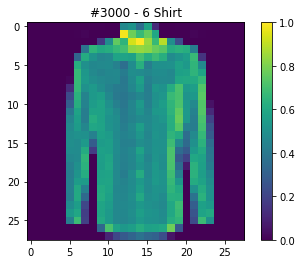

In [180]:
plt.figure()
idx_to_draw = 3000 # 바꾸어보세요
plt.imshow(train_images[idx_to_draw])

lbl = train_labels[idx_to_draw]

plt.title('#{} - {} {}'.format(idx_to_draw, lbl, class_names[lbl]))
plt.colorbar()
plt.grid(False)
plt.show()

<h3> Data PreProcessing</h3>

신경망 모델에 주입하기 전에 이 값의 범위를 0~1 사이로 조정하겠습니다. 이렇게 하려면 255로 나누어야 합니다. 훈련 세트와 테스트 세트를 동일한 방식으로 전처리하는 것이 중요합니다:

255픽셀의 값이므로 255로 나누면 0.0 ~ 1.0의 값을 가지게 됨.

In [153]:
train_images = train_images / 255.0

test_images = test_images / 255.0
X_train, X_test, y_train, y_test = train_test_split(train_images, train_labels)  #입력 데이터셋과 검증 데이터셋을 나누기 위해 default값인 0.25비율로 나눠서 사용함.

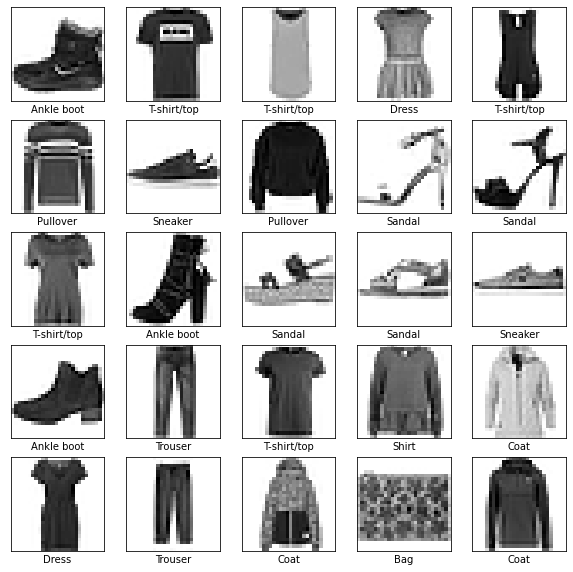

In [154]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

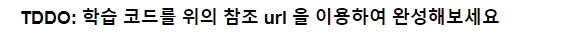

In [155]:
from tensorflow.keras import layers   #모델 구축
model = keras.Sequential()
model.add(layers.Flatten(input_shape = (28, 28)))  #제공된 데이터셋(n, 28, 28)에 맞춰 인풋 형상 정의
model.add(layers.Dense(128, activation = 'relu'))  #활성화 함수 relu 선언
model.add(layers.Dense(10, activation = 'softmax'))  #활성화 함수 softmax 


In [156]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy')

In [157]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(45000, 28, 28)
(15000, 28, 28)
(45000,)
(15000,)


In [158]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)   #0~9까지의 라벨 데이터 값을 원핫인코딩을 통해 각각의 인덱스 값에 1이 표시되는 형태로 변환
y_test = to_categorical(y_test)

In [159]:
y_train.shape  #변환완료된 라벨데이터의 형상

(45000, 10)

In [160]:
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [161]:
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 10, verbose = 1)  #검증데이터와 손실함수 값을 확인하면서 학습이 잘 이루어지고 있는지 관찰

Epoch 1/10
1407/1407 [==============================] - 4s 3ms/step - loss: 0.5262 - accuracy: 0.8175 - val_loss: 0.4274 - val_accuracy: 0.8485
Epoch 2/10
1407/1407 [==============================] - 3s 2ms/step - loss: 0.3908 - accuracy: 0.8602 - val_loss: 0.4011 - val_accuracy: 0.8558
Epoch 3/10
1407/1407 [==============================] - 3s 2ms/step - loss: 0.3533 - accuracy: 0.8718 - val_loss: 0.3723 - val_accuracy: 0.8641
Epoch 4/10
1407/1407 [==============================] - 3s 2ms/step - loss: 0.3241 - accuracy: 0.8813 - val_loss: 0.3343 - val_accuracy: 0.8792
Epoch 5/10
1407/1407 [==============================] - 3s 2ms/step - loss: 0.3081 - accuracy: 0.8876 - val_loss: 0.3459 - val_accuracy: 0.8745
Epoch 6/10
1407/1407 [==============================] - 3s 2ms/step - loss: 0.2894 - accuracy: 0.8941 - val_loss: 0.3259 - val_accuracy: 0.8801
Epoch 7/10
1407/1407 [==============================] - 3s 2ms/step - loss: 0.2760 - accuracy: 0.8968 - val_loss: 0.3246 - val_accuracy:

**데이터 시각화**  
데이터 시각화 결과 정확도는 꾸준히 상승곡선을 보여주고 있으며, 학습데이터에 대한 손실함수 값은 꾸준히 낮아지고 있지만, 검증데이터에 대한 손실함수 값은 점점 완만한 값을 보여주고 있다.  
추가 학습을 진행한다면 과적합이 날 확률이 높다고 생각된다.


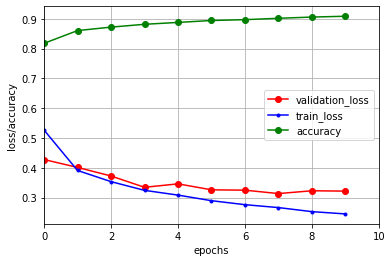

In [162]:
y_validation_loss = history.history['val_loss']
y_loss = history.history['loss']
accuracy_validation = history.history['accuracy']
x_length = np.arange(len(y_loss))

plt.plot(x_length, y_validation_loss, marker = 'o', c = 'red', label = 'validation_loss')
plt.plot(x_length, y_loss, marker = '.', c = 'blue', label = 'train_loss')
plt.plot(x_length, accuracy_validation, 'o-', c = 'green', label = 'accuracy')
plt.ylabel('loss/accuracy')
plt.xlabel('epochs')
plt.xlim(0, 10)
plt.legend()
plt.grid()
plt.show()

In [163]:
pred = model.predict(test_images)

In [164]:
print(pred[0])
print('predict pred[0] : ', np.argmax(pred[0]))
print('label pred[0] : ', test_labels[0])


[1.6689879e-07 9.8044289e-08 1.6720566e-08 3.8603885e-09 4.1819401e-09
 7.8958250e-04 4.3427403e-07 5.5848919e-03 2.2595273e-07 9.9362457e-01]
predict pred[0] :  9
label pred[0] :  9


In [165]:
def plot_image(i, predictions_array, true_label, img) :
    
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

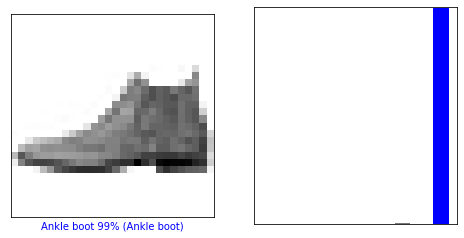

In [166]:
i = 0
plt.figure(figsize = (8, 4))
plt.subplot(1, 2, 1)
plot_image(i, pred, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, pred, test_labels)
plt.show()

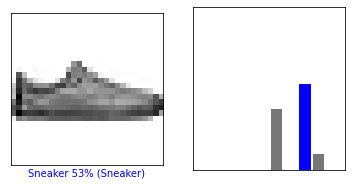

In [167]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, pred, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, pred,  test_labels)
plt.show()

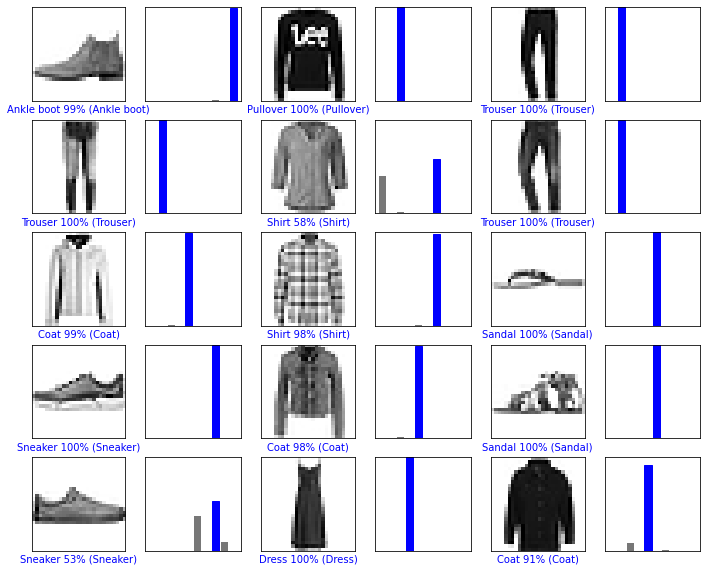

In [168]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, pred, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, pred, test_labels)
plt.show()

In [169]:
img = test_images[0]
print(img.shape)

(28, 28)


In [170]:
img = (np.expand_dims(img, 0))
print(img.shape)

(1, 28, 28)


In [171]:
pred_single = model.predict(img)
print(pred_single)

[[1.6689846e-07 9.8044289e-08 1.6720502e-08 3.8603809e-09 4.1819401e-09
  7.8958168e-04 4.3427363e-07 5.5848863e-03 2.2595212e-07 9.9362457e-01]]


In [172]:
np.argmax(pred_single)

9

In [173]:
pred = model.predict(test_images)

In [174]:
pred = np.argmax(pred)

In [175]:
pred

21

**데이터 평가**  
제공된 평가용 데이터셋을 이용해 평가해본 결과 학습 시 추출할 수 있었던 검증 데이터값과 큰 차이를 보이지 않는다.  
학습이 잘 이뤄졌다고 판단할 수 있었다.

In [176]:
test_labels = to_categorical(test_labels)
loss, accuracy = model.evaluate(test_images, test_labels)
print('loss : ', loss)
print('accuracy : ', accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.3480 - accuracy: 0.8774
loss :  0.3480388820171356
accuracy :  0.8773999810218811
